## INFERENTIAL STATISTICS 
* Inferential statistics generally involves generating deductions and/or predictions about a population. 
* E.G. If the average age of completing undergraduate level at university in Kampala is 22, we can use this information to make inferences for the other districts of Uganda e.g. by hypothesis testing.
* So you get a sample group to interview and use that to make inferences for the total population.

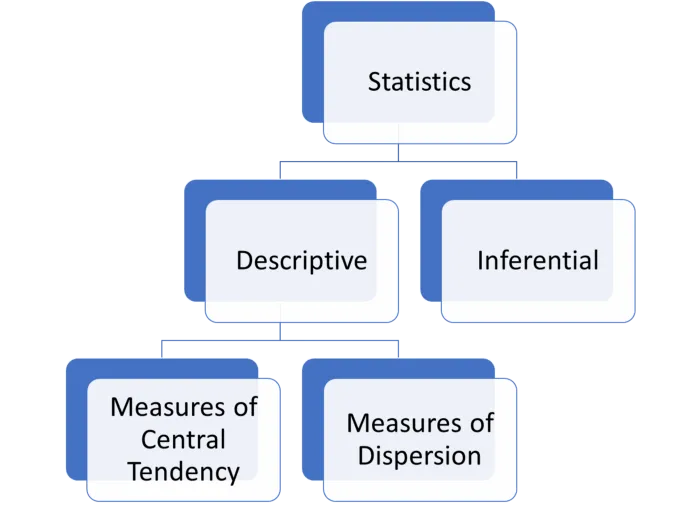

- Ways to make inferences:
1. Hypothesis testing
2. The standard error of the mean (SEM)
3. Confidence interval


## HYPOTHESIS TESTING ##

* Is a form of inferential statistics
* An assumption or idea, specifically a statistical claim about an unknown parameter.
* Presumptive statement

* Defining Hypotheses
* Null hypothesis (H0): In statistics, the null hypothesis is a general statement or default position that there is no relationship/no effects/no difference between two measured cases or among groups. In other words, it is a basic assumption or made based on the problem knowledge.
* Example using diamonds dataset: There is no relationship between carat and price

* Alternative hypothesis (H1/Ha/HA): The alternative hypothesis is contrary to the null hypothesis. 
* Example: There is a relationship between carat and price.

        ## Key Terms of Hypothesis Testing

* Level of significance(alpha): It refers to the degree of significance in which we accept or reject the null hypothesis. 100% accuracy is not possible for accepting a hypothesis, so we, therefore, select a level of significance that is usually 5%. 

* P-value: The P value, or calculated probability, is the probability of finding the observed/extreme results when the null hypothesis(H0) of a study-given problem is true. If your P-value is less than the chosen significance level then you reject the null hypothesis i.e. accept that your sample claims to support the alternative hypothesis.

* Test Statistic: The test statistic is a numerical value calculated from sample data during a hypothesis test, used to determine whether to reject the null hypothesis. It is compared to a critical value or p-value to make decisions about the statistical significance of the observed results.

* Critical value: The critical value in statistics is a threshold or cutoff point used to determine whether to reject the null hypothesis in a hypothesis test.
* Degrees of freedom: Degrees of freedom are associated with the variability or freedom one has in estimating a parameter. The degrees of freedom are related to the sample size and determine the shape.

       ## Steps in hypothesis testing
* 1. State and define null and alternative hypotheses
* 2. Choose a significance level (usually alpha = 0.05 or 5%)
* 3. Collect and analyse data
* 4. Calculate the test statistic and corresponding p-value
* 5. Make conclusions

In [14]:
#libraries
import pandas as pd
import numpy as np
import scipy.stats as stats

#Import datasets
diamonds=pd.read_excel("diamonds_new.xlsx")
medical=pd.read_csv("Cancer_data.csv")

## Statistical tests to investigate

**A. T-test**
* Compares the mean of two different samples or groups when the sample size is ≤ 30 
* Data should follow normal or Gaussian distribution
* Different types of T-tests:

**i. One Sample T-test:** 
* Used to compare the mean value of a sample with a known mean or average. 
* The null and alternative hypotheses of this T-test are as follows:
* i. Null Hypothesis: μ = M
* ii. Alternative Hypothesis: μ ≠ M
* Where μ is the sample mean and M is the known mean/population mean.

In [5]:
#Let's generate a random dataset that meets the above assumptions
import random
# We will use random data for the samples and label them as 'a' and 'b' respectively
#This calls the random.gauss function, which generates a random floating-point number from a Gaussian (normal) distribution with a mean of 50 and a standard deviation of 20.
a = [random.gauss(50, 20) for x in range(30)] #a variable with a list of 50
b = [random.gauss(55, 15) for x in range(30)]

#If we assume the population mean is 40
#Null hypothesis is the sample mean = population mean(40)
#alpha=0.05
#Therefore, p<0.05 (reject null hypothesis)
#Let's test it for sample a
t_stat, p_value = stats.ttest_1samp(a, 40, axis=0)

#Print the t-stat and the p-value
print("T-statistic:", t_stat)
print("P-value:", p_value)
print(np.mean(a))

T-statistic: 3.323912287864602
P-value: 0.00241310214420894
50.19250857400527


*      Interpretation of the results: 
* The p-value is less than 0.05(signifance level) and the sample mean(50.19) is also ≠ population mean(40).
* We reject the null hypothesis and accept the alternative hypothesis

**ii. Independent Sample T-test or Two Sample T-test**
* Null hypothesis: The means of samples are equal

In [7]:
# Null hypothesis: mean of a = mean of b
t_stat, p_value = stats.ttest_ind(a,b,equal_var = False)
#print results
print("T-statistic:", t_stat)
print("P-value:", p_value)
print(np.mean(a), np.mean(b))

#We can also add an if/else function which is defined as such:  
if p_value < 0.05:      
    print(" We can reject the null hypothesis")  
else:  
    print("We can accept the null hypothesis")  

T-statistic: -0.42146151000303733
P-value: 0.6750024151067231
50.19250857400527 52.15236256714354
We can accept the null hypothesis


* Interpretation of the results: 
* The p-value is greater than 0.05(signifance level) and the mean of a = mean of b
* We accept the null hypothesis and reject the alternative hypothesis

**iii. Dependent or Paired Sample T-test**
* A substantial difference between two related variables is tested using a univariate test
*  Null hypothesis: mean of b - mean of a = 0

In [8]:
t_stat,p_value = stats.ttest_rel(a,b)
#print results
print("T-statistic:", t_stat)
print("P-value:", p_value)
print(np.mean(a) - np.mean(b))
#Print conclusion
if p_value < 0.05:      
    print(" We can reject the null hypothesis")  
else:  
    print("We can accept the null hypothesis") 

T-statistic: -0.4337456828470809
P-value: 0.6676828455083401
-1.9598539931382746
We can accept the null hypothesis


**B. Z-test**
* Used to compare the difference between a sample and a known population mean or between the means of two independent samples. 
* Sample size is ≥ 30 and 
* The population standard deviation is known.
* There are two different types of Z-test:
* One-sample Z-test: Used to compare one sample mean with a known population mean.
i. Null Hypothesis: μ = μ₀
ii. Alternative Hypothesis: μ ≠ μ₀
Where μ is the population mean and μ₀ is a specified value you compare with the population mean.

**i. One-sample Z-test**
* Compares ones sample mean with a known population mean
* Null hypothesis: μ = μ₀
* Alternative Hypothesis: μ ≠ μ₀
* Where μ is the population mean and μ₀ is a specified value you compare with the population mean.

In [13]:
#Import the z-test library
from statsmodels.stats.weightstats import ztest as ztest
# Let's use the diamonds dataset
# Let's assume the mean price of a diamond is 200 and the standard deviation 40
#Specified value = 200
#Standard deviation = 40
# Range=53920 (testing hypothesis for the 53920 diamonds in the dataset)
diamonds['price'] = [random.gauss(200, 40) for x in range(53920)]

# One Sample Z-test for sample 'a'
# Null Hypothesis: Mean of diamond price = 200 
z_stat, p_value = ztest(diamonds['price'], value=200)

#print results
print("Z-statistic:", z_stat)
print("P-value:", p_value)
print(np.mean(diamonds['price']))

#print conclusion
if p_value < 0.05:      
    print(" We can reject the null hypothesis")  
else:  
    print("We can accept the null hypothesis") 

Z-statistic: 0.8059089168995973
P-value: 0.4202953693934157
200.1390453783929
We can accept the null hypothesis


*     Interpretation of results:
* We see that the mean price of the diamonds within the dataset is equal to the assumed mean price of 200

**ii. Two Sample Z-Test**
* Examines two independent data sets to determine whether or not the sample means of the two groups are identical.
* Null Hypothesis: Mean of a = mean of b
* Similar to the independent t-test
* To carry this out you have to first check if the variables are independent
* So let's use the Cancer dataset (medical dataframe) as the variable radius_mean amongst two different groups: patients with malignant and benign tumors (M and B)
* Null hypothesis: Mean of radius_mean of malignant tumors = Mean of radius_mean of benign tumors

In [16]:
#Import libraries
from scipy import stats  
from statsmodels.stats import weightstats as stests  

#State null hypothesis:
#Mean of radius_mean of malignant tumors = Mean of radius_mean of benign tumors
#

#Specify the groups
M=medical[medical["diagnosis"] == "M"].radius_mean
B=medical[medical["diagnosis"] == "B"].radius_mean

In [17]:
#Run the two-sided z-test
z_test ,p_value = stests.ztest(M, x2 = B, value = 0, alternative = 'two-sided')  

#Print results
print("Z-statistic:", z_stat)
print("P-value:", p_value)
print(np.mean(M), np.mean(B)) 

#Print conclusion 
if p_value < 0.05:  
    print("We can reject the null hypothesis")  
else:  
    print("We can accept the null hypothesis")  

Z-statistic: 0.8059089168995973
P-value: 1.0131691292988755e-142
17.462830188679245 12.146523809523808
We can reject the null hypothesis


*       Interpretation of results
* Null hypothesis is rejected
* Therefore, the mean of the radius_means of the tumors amongst Benign and Malignat groups are not equal

## Further Reading ##
* Hypothesis testing for Analysis of variance, or ANOVA or F-test
* Hypothesis testing for Chisquare test
* Hypothesis testing for Mann-Whitney U Test
* Hypothesis testing for Shapiro-wilk's test
* Hypothesis testing for Wilcoxon Signed-Rank Test
* Hypothesis testing for Kruskal-Wallis H Test
* Hypothesis testing for Kolmogorov–Smirnov test
* Differences between parametric and non-parametric tests



Parametric_ reliable on distribution of data
Non-parametric_not affected by distribution (Null hypothesis, i.e Robust to outliers)

## Practice Exercise ##
* Using the diamonds dataset, test the hypothesis that average price of all carat categories are the same.

* First turn our carat in to categories
* Discretize the variable 

Two sample Z-test Claiming price of Mean of group a = price of mean of group b
* Categories of carat = 0.0-0.1, 0.1-0.2, 0.2-0.3, 0.3-0.4. (Four categories)
* Mean price of category one = mean price of category two

Alternatively use the MANOVA test:
- Dependent variable = price
- Independet variables = groups of carat
- Compare Means across groups of dependents 

 -Categories: 100-85 (A)
 - 84-75 (B)
 - Discretizing 
 - Mean prices of each categor